In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import gzip
with gzip.open('goodreads_books.json.gz', 'r') as f:
    line = f.readline()

In [8]:
import json
json.loads(line)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [9]:
# Function to parse each line of the file
def parse(line):
    data = json.loads(line)
    return {
        "book_id": data.get("book_id"),
        "title": data.get("title"),
        "rating": data.get("ratings_count"),
        "url": data.get("url"),
        "image_url": data.get("image_url"),
        "average_rating": data.get("average_rating"),
    }

In [10]:
# Load the data into a list
books = []
with gzip.open('goodreads_books.json.gz', 'r') as f:
    for line in f:
        field = parse(line)
        try:
            rating = int(field["rating"])
        except ValueError:
            continue
        if rating > 15:
            books.append(field)

In [11]:
titles = pd.DataFrame.from_records(books)
titles.head()

,book_id,title,rating,url,image_url,average_rating
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49
2,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,4.13
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,4.22
4,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,3.81


In [12]:
titles['rating'] = pd.to_numeric(titles['rating'])

In [13]:
titles['average_rating'] = pd.to_numeric(titles['average_rating'])

In [14]:
titles.head()

,book_id,title,rating,url,image_url,average_rating
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49
2,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,4.13
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,4.22
4,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,3.81


In [15]:
titles['edit_title'] = titles['title'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

In [16]:
titles.head()

,book_id,title,rating,url,image_url,average_rating,edit_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03,The Unschooled Wizard Sun Wolf and Starhawk 12
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49,Best Friends Forever
2,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,4.13,The Aeneid for Boys and Girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,4.22,Alls Fairy in Love and War Avalon Web of Magic 8
4,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,3.81,The Devils Notebook


In [17]:
# Lowercase the edit_title column
titles['edit_title'] = titles['edit_title'].str.lower()

In [18]:
# Remove extra spaces
titles['edit_title'] = titles['edit_title'].str.replace('\s+', ' ', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Abdul\AppData\Local\Temp\ipykernel_14636\3952347300.py:2: SyntaxWarning: invalid escape sequence '\s'
  titles['edit_title'] = titles['edit_title'].str.replace('\s+', ' ', regex=True)


In [19]:
titles.head()

,book_id,title,rating,url,image_url,average_rating,edit_title
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,4.03,the unschooled wizard sun wolf and starhawk 12
1,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,3.49,best friends forever
2,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,4.13,the aeneid for boys and girls
3,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,98,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,4.22,alls fairy in love and war avalon web of magic 8
4,287149,The Devil's Notebook,986,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,3.81,the devils notebook


<Axes: >

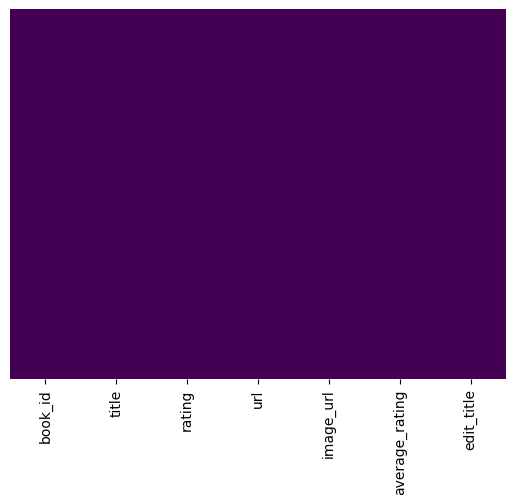

In [20]:
# check for missing values
sns.heatmap(titles.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [21]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   book_id         1308957 non-null  object 
 1   title           1308957 non-null  object 
 2   rating          1308957 non-null  int64  
 3   url             1308957 non-null  object 
 4   image_url       1308957 non-null  object 
 5   average_rating  1308957 non-null  float64
 6   edit_title      1308957 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 69.9+ MB


In [22]:
titles.isnull().sum()

book_id           0
title             0
rating            0
url               0
image_url         0
average_rating    0
edit_title        0
dtype: int64

In [23]:
# Drop missing values
titles.dropna(inplace=True)

In [24]:
titles.isnull().sum()

book_id           0
title             0
rating            0
url               0
image_url         0
average_rating    0
edit_title        0
dtype: int64

In [25]:
titles.describe()

,rating,average_rating
count,1.308957e+06,1.308957e+06
mean,7.279124e+02,3.885648e+00
std,1.493248e+04,3.611875e-01
min,1.600000e+01,0.000000e+00
25%,3.000000e+01,3.670000e+00
50%,6.400000e+01,3.910000e+00
75%,1.870000e+02,4.130000e+00
max,4.899965e+06,5.000000e+00


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
tfidf = vector.fit_transform(titles['edit_title'])

In [27]:
# create a cosine similarity matrix with filtered data
from sklearn.metrics.pairwise import cosine_similarity
import re

# Function to make the URLs clickable
def make_clickable(val):
    return '<a target="_blank" href="{}">click</a>'.format(val)

# Function to display images
def show_image(val):
    return '<img src="{}" width="100" height="100">'.format(val)

# Function to search for books
def search(query):
    query = re.sub("[^a-zA-Z0-9 ]", "", query.lower())
    query_vector = vector.transform([query])
    similarity = cosine_similarity(query_vector, tfidf).flatten()
    indices = np.argpartition(similarity, -10)[-10:]
    results = titles.loc[indices]
    results.sort_values('rating', ascending=False, inplace=True)
    return results.head(10).style.format({'url': make_clickable, 'image_url': show_image})


In [32]:
search('Mein Kampf')

,book_id,title,rating,url,image_url,average_rating,edit_title
324,54270,Mein Kampf,16837,click,,3.130000,mein kampf
1219923,741235,Mein Kampf,492,click,,3.130000,mein kampf
603175,642623,Mein Kampf,454,click,,3.130000,mein kampf
215294,18890332,Mein Kampf,124,click,,3.130000,mein kampf
988194,426749,Mein Kampf,59,click,,3.130000,mein kampf
934488,1239884,Mein Kampf,58,click,,3.130000,mein kampf
62630,19017887,Mein Kampf,35,click,,3.130000,mein kampf
84317,3427872,Mein Kampf,27,click,,3.130000,mein kampf
261121,7296820,Mein Kampf,23,click,,3.130000,mein kampf
1109638,8071859,Mein Kampf,22,click,,3.140000,mein kampf


In [29]:
titles.to_csv('D:\\Data_Science\\My projects in Data Science and ML\\extra files for book recommendation\\titles.csv', index=False)